In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from statistics import mean
from collections import Counter

# Reading The CreditCard.csv file

In [2]:
pr=pd.read_csv("creditcard.csv")

# Information About The DataSet

In [3]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#  Checking For Unexpected Value instead Of Float And Integer

In [4]:
for labels in pr:
    for i in pr[labels]:
        if(type(i)==float or type(i)==int):
            continue
        else:
            print("Wrong Data")
            pr.replace(i,-99999)#replacing with -99999

# Graph For Amount And Time

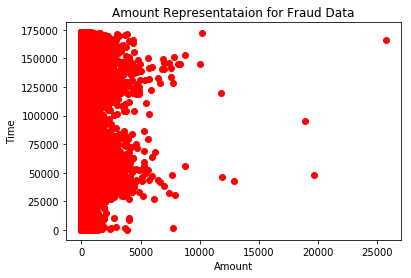

In [5]:
plt.scatter(pr.iloc[:,29],pr.iloc[:,0],color="Red")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.title("Amount Representataion for Fraud Data")
plt.show()

# Data Sorting

In [6]:
sds={"NF":[],"F":[]}
for i in range (len(pr.iloc[:,len(pr.columns)-1])):
    if(1==pr.iloc[:,len(pr.columns)-1][i]):
        sds['F'].append(pr.iloc[i,1:(len(pr.columns)-1)])
    else:
        sds['NF'].append(pr.iloc[i,1:(len(pr.columns)-1)])

# Analyzing The Data Quantity

In [7]:
a=len(sds['F'])
b=len(sds['NF'])
print("Fraud Data = ",a)
print("Not Fraud Data = ",b)

Fraud Data =  492
Not Fraud Data =  284315


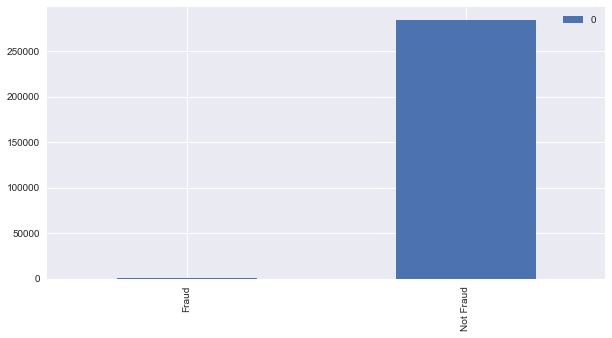

In [8]:
import seaborn as sns
sns.set()
df = pd.DataFrame([len(sds['F']),len(sds['NF'])])
df.index = ['Fraud','Not Fraud']
df.plot(kind='bar',stacked=True, figsize=(10,5))

# Analyzing Each Field Using SeaBorn Library

Dark Blue Represents Fraud Data
Green represents Non-Fraud Data


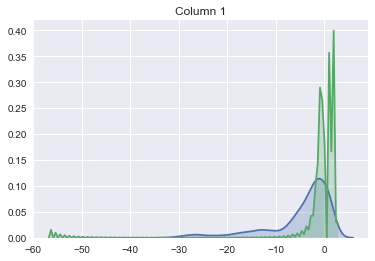

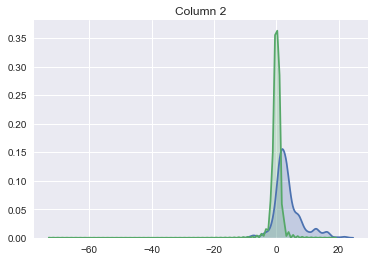

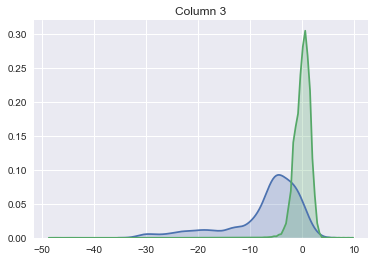

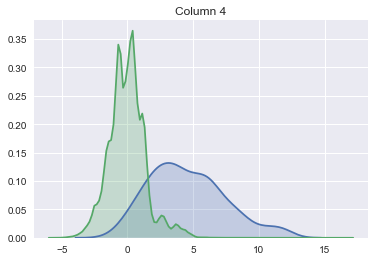

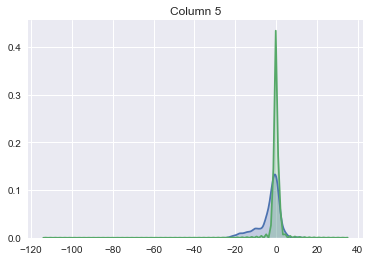

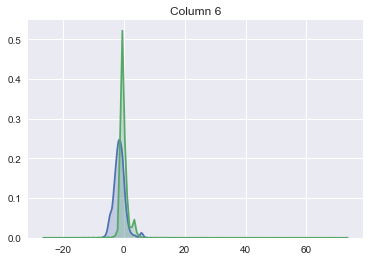

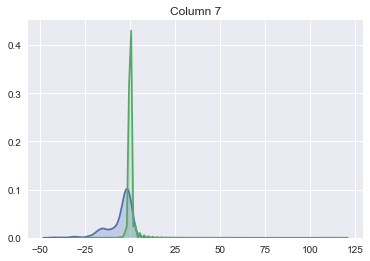

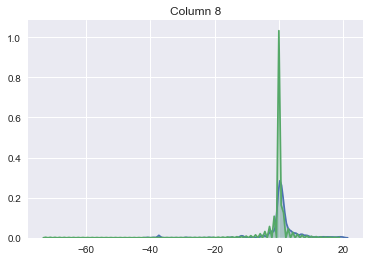

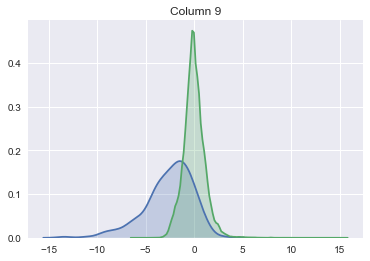

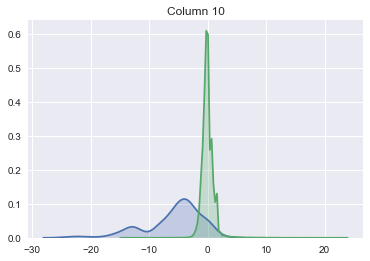

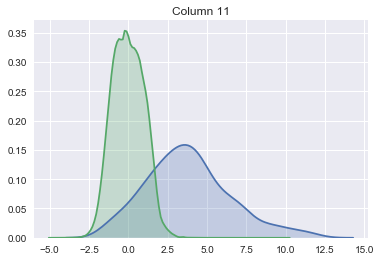

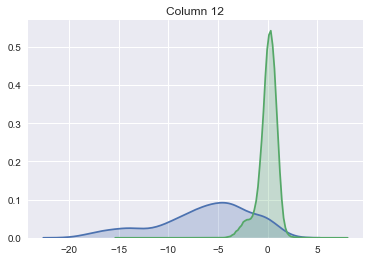

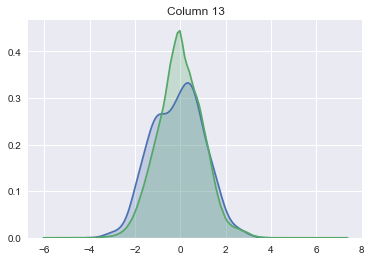

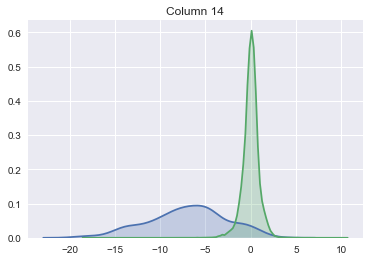

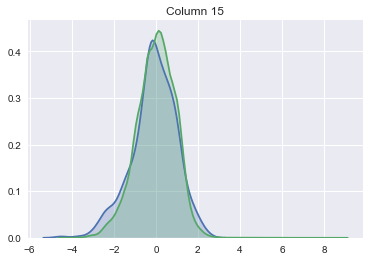

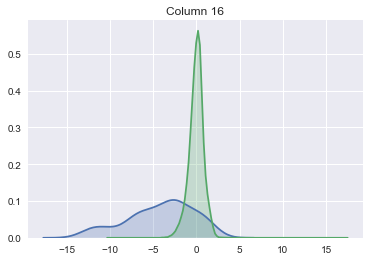

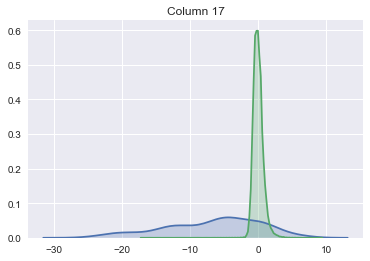

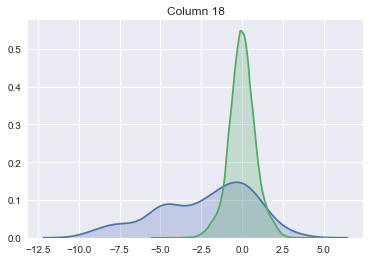

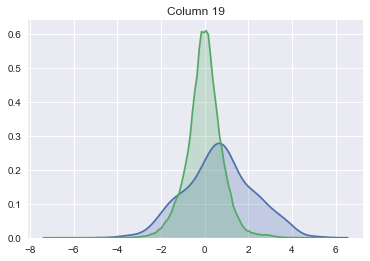

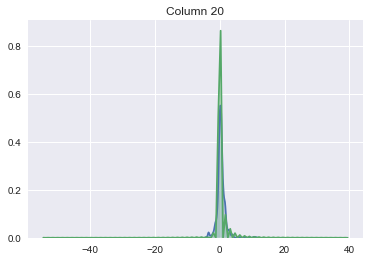

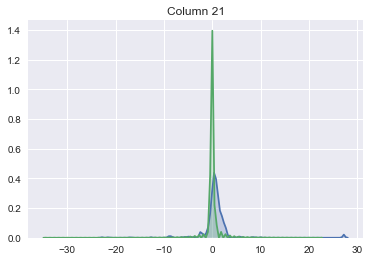

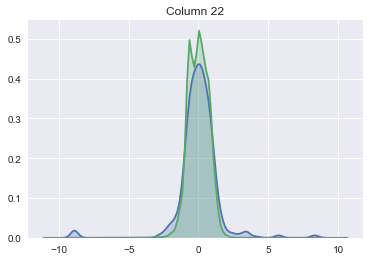

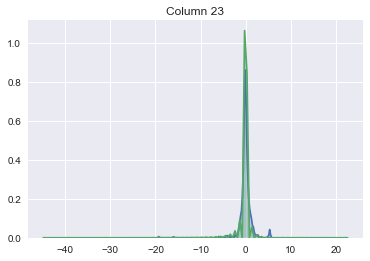

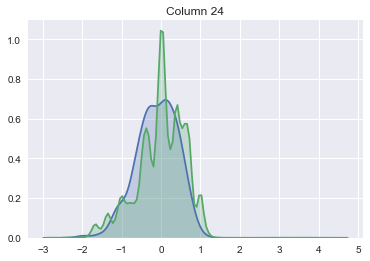

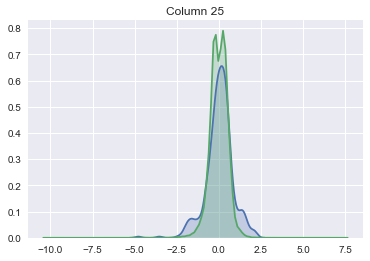

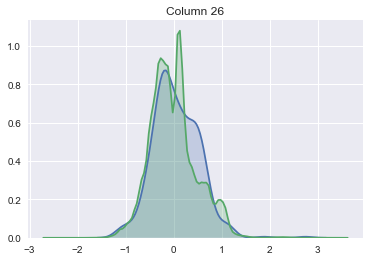

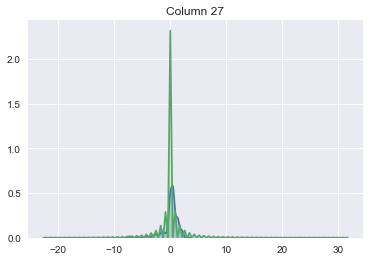

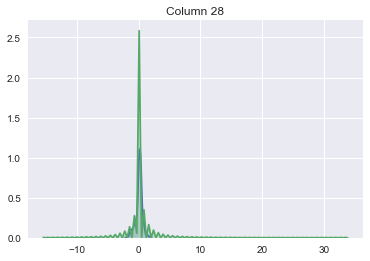

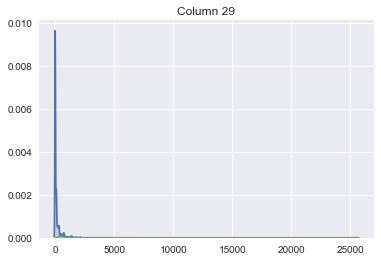

In [9]:
print("Dark Blue Represents Fraud Data")
print("Green represents Non-Fraud Data")
for j in range (len(sds['F'][0])):
    data1=[]
    data2=[]
    for i in range (len(sds['F'])):
        data1.append(sds['F'][i][j])
    for i in range (len(sds['NF'])):
        data2.append(sds['NF'][i][j])
    sns.kdeplot(data1, shade=True)
    sns.kdeplot(data2,shade=True)
    plt.title("Column"+" "+str(j+1))
    plt.show()

# Plot For Amount and V1 Data Entry

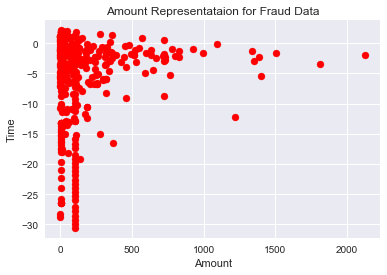

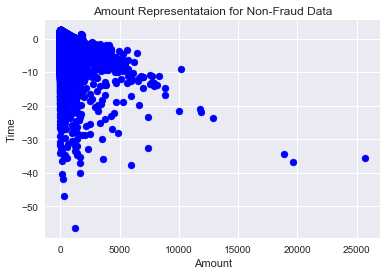

In [10]:
amount1=[]
v1=[]
amount2=[]
v2=[]
for i in range (len(sds['F'])):
    amount1.append(sds['F'][i][28])
    v1.append(sds['F'][i][0])
for i in range (len(sds['NF'])):
    amount2.append(sds['NF'][i][28])
    v2.append(sds['NF'][i][0])
plt.scatter(amount1,v1,color="Red")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.title("Amount Representataion for Fraud Data")
plt.show()
plt.scatter(amount2,v2,color="Blue")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.title("Amount Representataion for Non-Fraud Data")
plt.show()

# KNN Algorithm

In [11]:
def k_nearest_neighbors(dataset,predict, k=3):
    if len(dataset) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in dataset:
        for features in dataset[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    print(votes)
    print(Counter(votes))
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

# Random Test Data 

In [13]:
def result(res):
    if (res=='NF'):
        print("The Data Is Legitimate i.e, Non-Fraud Data")
    else:
        print("The Data Is Fraud")

In [14]:
res=k_nearest_neighbors(sds,(pr.iloc[541,1:(len(pr.columns)-1)]))
result(res)

['F', 'F', 'F']
Counter({'F': 3})
The Data Is Fraud


In [15]:
res=k_nearest_neighbors(sds,(pr.iloc[51,1:(len(pr.columns)-1)]))
result(res)

['NF', 'NF', 'NF']
Counter({'NF': 3})
The Data Is Legitimate i.e, Non-Fraud Data
